# 嘗試利用上禮拜所教的分歧來看看準確率

In [1]:
%env KERAS_BACKEND = tensorflow
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

env: KERAS_BACKEND=tensorflow


In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()

In [4]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [5]:
from keras.utils import np_utils  #轉成1-hot

In [6]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D,MaxPool2D #2D 矩陣
from keras.optimizers import SGD
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate, add

In [9]:
model = Sequential()

In [10]:
x_test[1234]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

嘗試利用上禮拜教的方式來建立模型

In [11]:
f_1=Conv2D(4,(5,5), padding='same',activation='relu')
pool_1 = MaxPool2D(pool_size=(2, 2))
f_2=Conv2D(8,(5,5), padding='same',activation='relu')
pool_2 = MaxPool2D(pool_size=(2, 2))
f_3=Conv2D(16,(5,5), padding='same',activation='relu')
pool_3 = MaxPool2D(pool_size=(2, 2))
f_4=Conv2D(32,(5,5), padding='same',activation='relu')
pool_4 = MaxPool2D(pool_size=(2, 2))
f_5=Dense(10,activation='softmax')

In [12]:
x=Input(shape=(28,28,1))
h_1=pool_1(f_1(x))
h_2=pool_2(f_2(h_1))
h_3=pool_3(f_3(h_2))
h_4=Flatten()(pool_4(f_4(h_3)))
h_5=f_5(h_4)

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model=Model(x,h_5)

In [14]:
model.compile(loss='mse',optimizer=SGD(lr=0.07),metrics=['accuracy'])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 4)         104       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         808       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          3216      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 16)          0         
__________

In [16]:
model_test_1 = model.fit(x_train,y_train,batch_size=100,epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 53s 875us/step - loss: 0.0898 - acc: 0.0935
Epoch 2/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0894 - acc: 0.1758
Epoch 3/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.0878 - acc: 0.2768
Epoch 4/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.0622 - acc: 0.5913
Epoch 5/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0251 - acc: 0.8361
Epoch 6/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0171 - acc: 0.8888 ETA: 4s - loss: 0.0184 - ETA: 3
Epoch 7/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.0136 - acc: 0.9124
Epoch 8/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.0114 - acc: 0.9258
Epoch 9/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0099 - acc: 0.9363
Epoch 10/10

這次將第2層filter 分歧成兩個大小一樣的

In [17]:
f_1=Conv2D(4,(5,5), padding='same',activation='relu')
pool_1 = MaxPool2D(pool_size=(2, 2))
f_2_1=Conv2D(8,(5,5), padding='same',activation='relu')
pool_2_1 = MaxPool2D(pool_size=(2, 2))
f_2_2=Conv2D(8,(5,5), padding='same',activation='relu')
pool_2_2 = MaxPool2D(pool_size=(2, 2))
f_3=Conv2D(16,(5,5), padding='same',activation='relu')
pool_3 = MaxPool2D(pool_size=(2, 2))
f_4=Conv2D(32,(5,5), padding='same',activation='relu')
pool_4 = MaxPool2D(pool_size=(2, 2))
f_5=Dense(10,activation='softmax')

x=Input(shape=(28,28,1))
h_1=pool_1(f_1(x))
h_2_1=pool_2_1(f_2_1(h_1))
h_2_2=pool_2_2(f_2_2(h_1))
h_3=pool_3(concatenate([h_2_1,h_2_2]))
h_4=Flatten()(pool_4(f_4(h_3)))
h_5=f_5(h_4)

model=Model(x,h_5)

model.compile(loss='mse',optimizer=SGD(lr=0.07),metrics=['accuracy'])

model.summary()

model_test_2 = model.fit(x_train,y_train,batch_size=100,epochs=10)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 28, 28, 4)    104         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 14, 14, 4)    0           conv2d_5[0][0]                   
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 14, 14, 8)    808         max_pooling2d_5[0][0]            
__________________________________________________________________________________________________
conv2d_7 (

# 嘗試延續第二個模型，加倍模型

In [18]:
f_1=Conv2D(8,(5,5), padding='same',activation='relu')
pool_1 = MaxPool2D(pool_size=(2, 2))
f_2_1=Conv2D(16,(5,5), padding='same',activation='relu')
pool_2_1 = MaxPool2D(pool_size=(2, 2))
f_2_2=Conv2D(16,(5,5), padding='same',activation='relu')
pool_2_2 = MaxPool2D(pool_size=(2, 2))
f_3=Conv2D(32,(5,5), padding='same',activation='relu')
pool_3 = MaxPool2D(pool_size=(2, 2))
f_4=Conv2D(64,(5,5), padding='same',activation='relu')
pool_4 = MaxPool2D(pool_size=(2, 2))
f_5=Dense(10,activation='softmax')

x=Input(shape=(28,28,1))
h_1=pool_1(f_1(x))
h_2_1=pool_2_1(f_2_1(h_1))
h_2_2=pool_2_2(f_2_2(h_1))
h_3=pool_3(concatenate([h_2_1,h_2_2]))
h_4=Flatten()(pool_4(f_4(h_3)))
h_5=f_5(h_4)

model=Model(x,h_5)

model.compile(loss='mse',optimizer=SGD(lr=0.07),metrics=['accuracy'])

model.summary()

model_test_3 = model.fit(x_train,y_train,batch_size=50,epochs=10)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 28, 28, 8)    208         input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_10 (MaxPooling2D) (None, 14, 14, 8)    0           conv2d_10[0][0]                  
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 14, 14, 16)   3216        max_pooling2d_10[0][0]           
__________________________________________________________________________________________________
conv2d_12 

<function matplotlib.pyplot.show(*args, **kw)>

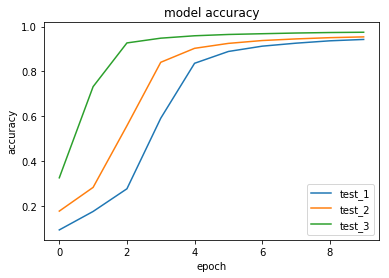

In [20]:
plt.plot(model_test_1.history['acc'])
plt.plot(model_test_2.history['acc'])
plt.plot(model_test_3.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["test_1","test_2","test_3"],loc = "best")
plt.show

# 結論
雖然加入分歧與加倍模型對訓練術度與準確度有幫助，但是準確度都算是挺高的了。

因此我認為，之後做的模型是可以去做選擇的。